In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [3]:
df=pd.read_csv("C:/Users/hp/Downloads/loan_data.csv")

In [4]:
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()          # information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [7]:
df.dtypes           # Types of DataTypes present in DataSet

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df.shape            # Shape of Dataset i.e Number of Rows and Columns Present in Dataset

(381, 13)

In [9]:
df.size             # Size of DataSet i.e Total number of Elements Present in Dataset

4953

In [10]:
df.isnull().sum()       # Checking Null Values present in dataset

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df1=df.dropna()       # Dropping Null Values present in Dataset

In [12]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Performing LabelEncoding On DataSet

In [14]:
le=LabelEncoder()          # To convert categorical data into numerical data for model building

In [15]:
df1["Loan_ID"]=le.fit_transform(df1["Loan_ID"])
df1["Gender"]=le.fit_transform(df1["Gender"])
df1["Married"]=le.fit_transform(df1["Married"])
df1["Dependents"]=le.fit_transform(df1["Dependents"])
df1["Education"]=le.fit_transform(df1["Education"])
df1["Self_Employed"]=le.fit_transform(df1["Self_Employed"])
df1["Property_Area"]=le.fit_transform(df1["Property_Area"])
df1["Loan_Status"]=le.fit_transform(df1["Loan_Status"])

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\4008765204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Loan_ID"]=le.fit_transform(df1["Loan_ID"])
C:\Users\hp\AppData\Local\Temp\ipykernel_12844\4008765204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gender"]=le.fit_transform(df1["Gender"])
C:\Users\hp\AppData\Local\Temp\ipykernel_12844\4008765204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [16]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [17]:
df1.describe().T       # Statistical Summary Of Dataset

,count,mean,std,min,25%,50%,75%,max
Loan_ID,308.0,153.500000,89.056162,0.0,76.75,153.5,230.25,307.0
Gender,308.0,0.795455,0.404025,0.0,1.00,1.0,1.00,1.0
Married,308.0,0.600649,0.490562,0.0,0.00,1.0,1.00,1.0
Dependents,308.0,0.678571,0.997029,0.0,0.00,0.0,1.00,3.0
Education,308.0,0.256494,0.437408,0.0,0.00,0.0,1.00,1.0
Self_Employed,308.0,0.090909,0.287948,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,308.0,3599.126623,1462.359612,150.0,2568.75,3329.5,4291.00,9703.0
CoapplicantIncome,308.0,1278.434805,2520.961308,0.0,0.00,871.5,1953.50,33837.0
LoanAmount,308.0,104.623377,29.382256,9.0,89.75,110.0,128.00,150.0
Loan_Amount_Term,308.0,341.181818,68.246006,36.0,360.00,360.0,360.00,480.0


### Changing DataTypes of Data in Dataset

In [18]:
df1["CoapplicantIncome"]=df1["CoapplicantIncome"].astype("int")
df1["LoanAmount"]=df1["LoanAmount"].astype("int")
df1["Loan_Amount_Term"]=df1["Loan_Amount_Term"].astype("int")
df1["Credit_History"]=df1["Credit_History"].astype("int")

C:\Users\hp\AppData\Local\Temp\ipykernel_12844\1689938164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CoapplicantIncome"]=df1["CoapplicantIncome"].astype("int")
C:\Users\hp\AppData\Local\Temp\ipykernel_12844\1689938164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["LoanAmount"]=df1["LoanAmount"].astype("int")
C:\Users\hp\AppData\Local\Temp\ipykernel_12844\1689938164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

### Removing Outliers present in Dataset

<Axes: >

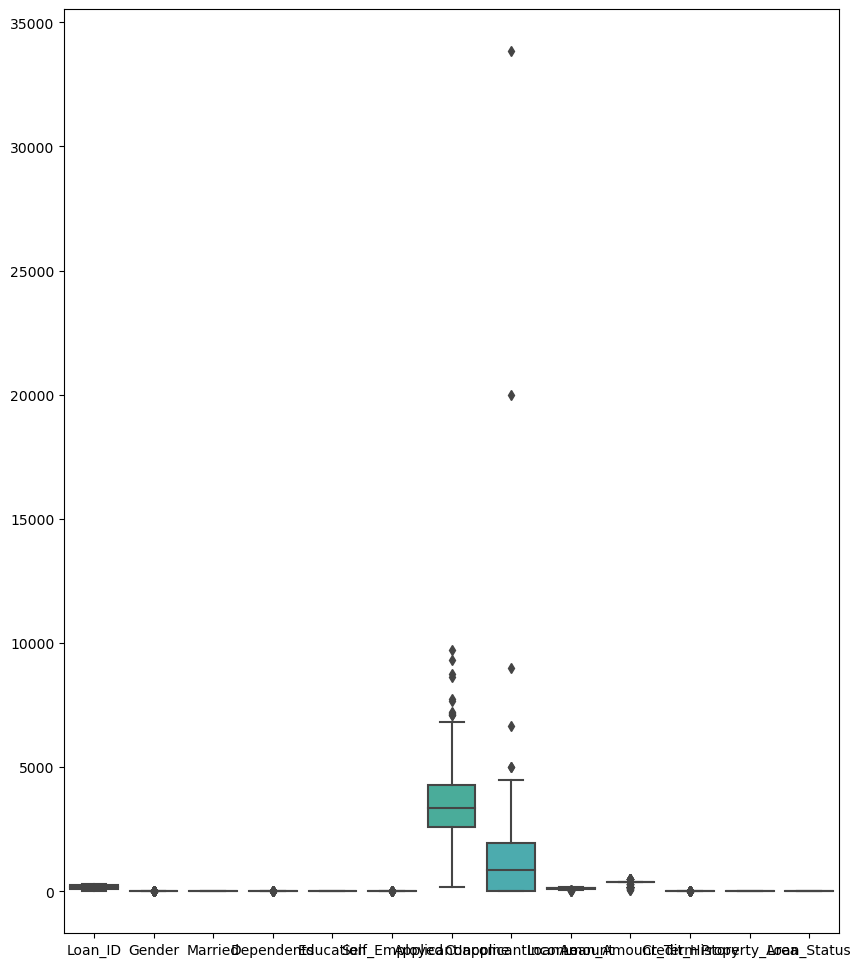

In [19]:
plt.figure(figsize=(10,12))        # Ploting Boxplot to detect outliers
sns.boxplot(data=df1)

### Steps to Remove Outliers

In [20]:
Q1=df1.quantile(q=0.25)         # finding Q1 value
Q3=df1.quantile(q=0.75)         # Finding Q3 value
IQR=Q3-Q1                       # Finding IQR Value i.e(InterQuantileRange)
upper=Q3+(1.5*IQR)              # to detect upper outliers
lower=Q1-(1.5*IQR)              # to detect lower outliers

In [21]:
df2=df1[~((df1>upper)|(df1<lower))]

<Axes: >

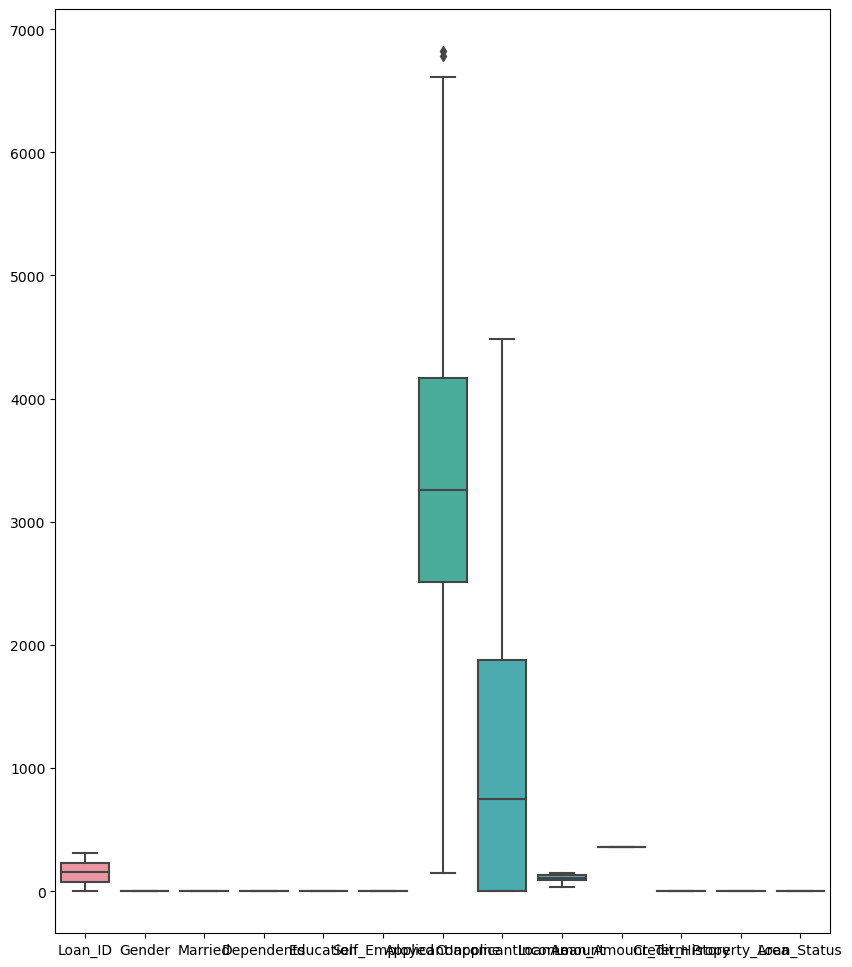

In [22]:
plt.figure(figsize=(10,12))         # Boxplot after removing Outliers
sns.boxplot(df2)              

In [23]:
df2.isnull().sum()       # After removing outlier we get some nan values 

Loan_ID               0
Gender               63
Married               0
Dependents           24
Education             0
Self_Employed        28
ApplicantIncome      11
CoapplicantIncome     6
LoanAmount            7
Loan_Amount_Term     49
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df3=df2.dropna()     # removing that nan values

### HeatMap To Show Corelation between Data

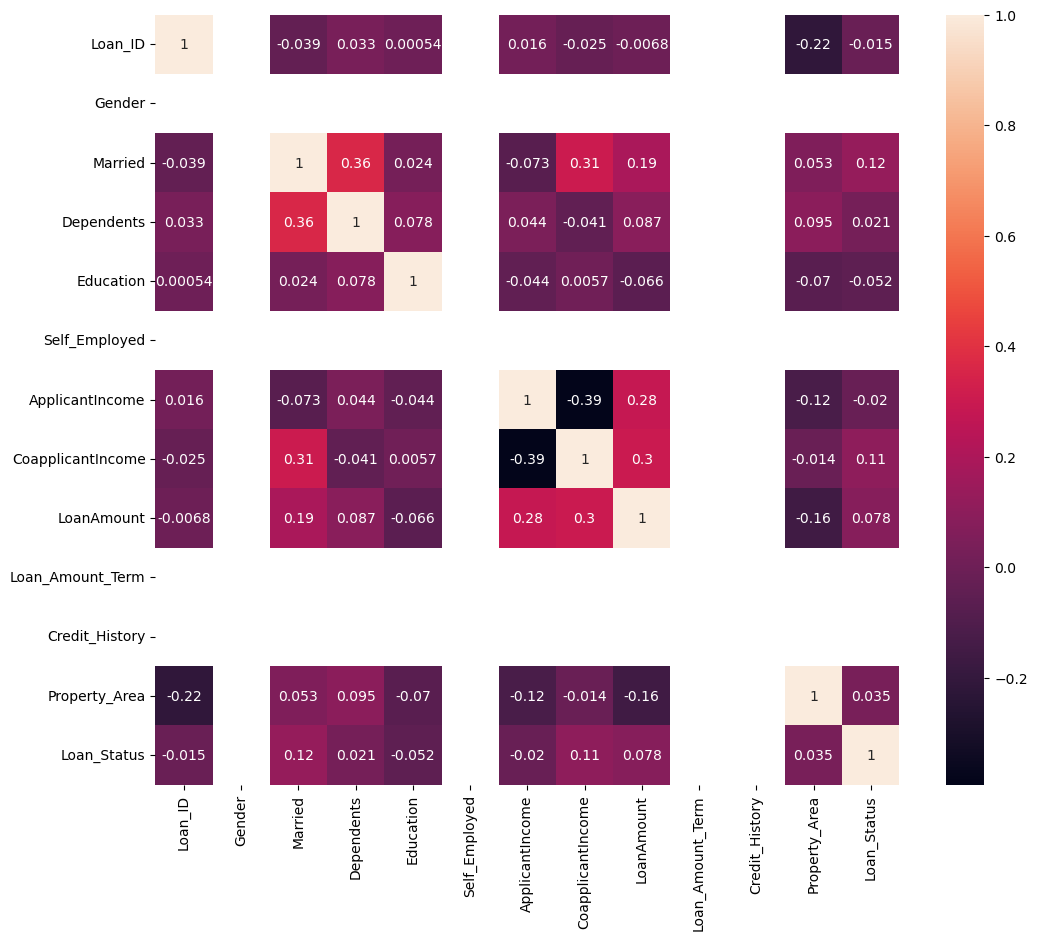

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [26]:
print(df1["Loan_Status"].unique())
print(df1["Loan_Status"].value_counts(normalize=True)*100)

[0 1]
Loan_Status
1    71.103896
0    28.896104
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x294fad145d0>,
 [Text(-0.6770310906241628, 0.866965340903693, 'YES'),
  Text(0.6770310906241627, -0.8669653409036931, 'NO')])

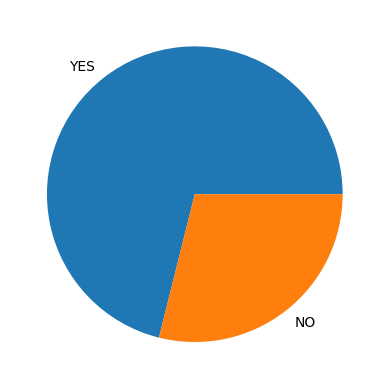

In [27]:
plt.pie(df2["Loan_Status"].value_counts(normalize=True)*100,labels=["YES","NO"])

## Model Building for DataSet

In [28]:
x=df3.drop(["Loan_Status"],axis=1)
y=df3["Loan_Status"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)    # splliting data into x and y

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(99, 12)
(43, 12)
(99,)
(43,)


#### LOGISTIC REGRESSION ALGORITHM

In [31]:
le=LogisticRegression()
le.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_true,y_pred=y_test,le.predict(x_test)
print(le.score(x_train,y_train)*100)
print(le.score(x_test,y_test)*100)

86.86868686868688
88.37209302325581


In [33]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

88.37209302325581
100.0
88.37209302325581


#### RANDOM FOREST CLASSIFIER ALGORITHM

In [34]:
rf=RandomForestClassifier(n_estimators=6,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6, random_state=1)

In [35]:
y_true,y_pred=y_test,rf.predict(x_test)
print(rf.score(x_train,y_train)*100)
print(rf.score(x_test,y_test)*100)

95.95959595959596
83.72093023255815


In [36]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

87.8048780487805
94.73684210526315
83.72093023255815


#### DECISION TREE CLASSIFIER ALGORITHM

In [37]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [38]:
y_true,y_pred=y_test,dt.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

94.94949494949495
88.37209302325581


In [39]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

90.2439024390244
97.36842105263158
88.37209302325581


#### GRADIENT BOOSTING CLASSIFIER ALGORITHM

In [40]:
gb=GradientBoostingClassifier(n_estimators=20)
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [41]:
y_true,y_pred=y_test,gb.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

94.94949494949495
88.37209302325581


In [42]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred).*100)

90.47619047619048
100.0
90.69767441860465


#### BAGGING CLASSIFIER ALGORITHM

In [43]:
bg=BaggingClassifier(n_estimators=20)
bg.fit(x_train,y_train)

BaggingClassifier(n_estimators=20)

In [44]:
y_true,y_pred=y_test,bg.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

94.94949494949495
88.37209302325581


In [45]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

90.47619047619048
100.0
90.69767441860465


#### ADABOOST CLASSIFIER ALGORITHM

In [46]:
ad=AdaBoostClassifier(n_estimators=20,estimator=dt,random_state=1)
ad.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   n_estimators=20, random_state=1)

In [47]:
y_true,y_pred=y_test,ad.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

94.94949494949495
88.37209302325581


In [48]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

90.47619047619048
100.0
90.69767441860465


#### KNeighbors CLASSIFIER ALGORITHM

In [49]:
kn=KNeighborsClassifier(weights="distance")
kn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [50]:
y_true,y_pred=y_test,kn.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

94.94949494949495
88.37209302325581


In [51]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

87.5
92.10526315789474
81.3953488372093


#### SVC (SUPPORT VECTOR CLASSIFIER) ALGORITHM

In [52]:
svc=SVC(C=1.0,kernel="linear")
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [53]:
y_true,y_pred=y_test,svc.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

94.94949494949495
88.37209302325581


In [54]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

88.37209302325581
100.0
88.37209302325581


In [ ]:
#The best fit model for this bank loan data set are Gradient boosting algorithm, bagging classifier algorithm, adaboost classifier algorithm.